In [13]:
import seaborn as sns; sns.set_theme(color_codes=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
plt.style.use('ggplot')
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.rcParams["font.family"] = "Times New Roman"
from pandas import Series,DataFrame
from scipy.signal import find_peaks
from scipy import stats
from scipy import signal
from IPython.display import clear_output 
clear_output()

In [14]:
def smooth_binary_sequence(sequence, window_size):
    smoothed_sequence = sequence.rolling(window=window_size, center=True).mean()
    smoothed_sequence = np.round(smoothed_sequence)
    
    # Replace NaN with 0 before converting to integers
    smoothed_sequence = smoothed_sequence.fillna(0).astype(int)
    
    return smoothed_sequence

In [15]:
def save_data(data_id,df):
    path = os.path.join(save_data_path, data_id + ".csv")
    print("Saving Data", data_id)
    df.to_csv(path)

In [16]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(save_figure_path, fig_id + ".svg")
    path_png = os.path.join(save_figure_path, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='svg', dpi=300)
    plt.savefig(path_png, format='png', dpi=300)

In [17]:
save_figure_path =r'D:\Users\123456\Desktop\self_stimulation\save_figure\汇总'
experiment_group_file = r'D:\Users\123456\Desktop\self_stimulation\save_data\experiment\results.csv'  # 实验组CSV文件路径
control_group_file = r'D:\Users\123456\Desktop\self_stimulation\save_data\control\results.csv'  # 对照组CSV文件路径
inhibition_group_file = r'D:\Users\123456\Desktop\self_stimulation\save_data\inhibition\results.csv'  # 抑制组CSV文件路径

Saving figure nosopoke result-experiment


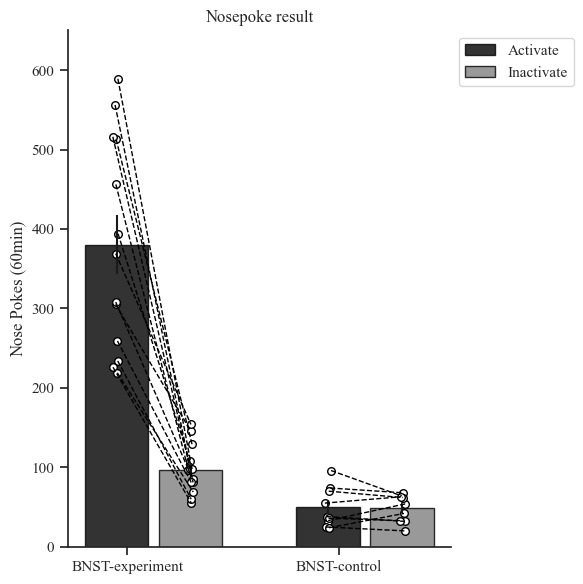

In [18]:
# 读取CSV文件
experiment_data = pd.read_csv(experiment_group_file)
control_data = pd.read_csv(control_group_file)
Activate_events_experiment=[c for c in experiment_data.columns if '_activate' in c]
Inactivate_events_experiment=[c for c in experiment_data.columns if '_inactivate' in c]
Activate_events_control=[c for c in control_data.columns if '_activate' in c]
Inactivate_events_control=[c for c in control_data.columns if '_inactivate' in c]

mean_experiment_activate = experiment_data[Activate_events_experiment].iloc[0].mean()
mean_experiment_inactivate = experiment_data[Inactivate_events_experiment].iloc[0].mean()
mean_control_activate = control_data[Activate_events_control].iloc[0].mean()
mean_control_inactivate = control_data[Inactivate_events_control].iloc[0].mean()

sem_experiment_activate = experiment_data[Activate_events_experiment].iloc[0].sem()
sem_experiment_inactivate = experiment_data[Inactivate_events_experiment].iloc[0].sem()
sem_control_activate = control_data[Activate_events_control].iloc[0].sem()
sem_control_inactivate = control_data[Inactivate_events_control].iloc[0].sem()

# 设置图像大小
plt.figure(figsize=(6, 6))  
plt.rcParams['font.sans-serif'] = 'SimHei'  # 支持中文字体

# 设置柱子宽度和间距
width = 0.3  # 保持柱子宽度
gap = 0.05   # 控制柱间距

# 计算柱子位置
x1 = np.array([0, 1])  # 第一个x轴位置: [实验组, 对照组]
x2 = x1 + width + gap  # 第二个x轴位置，用于未激活事件

# 绘制柱状图
plt.bar(x1[0], mean_experiment_activate, width, yerr=sem_experiment_activate, alpha=0.8, label='Activate', color='black', edgecolor='black')
plt.bar(x2[0], mean_experiment_inactivate, width, yerr=sem_experiment_inactivate, alpha=0.8, label='Inactivate', color='grey', edgecolor='black')

plt.bar(x1[1], mean_control_activate, width, yerr=sem_control_activate, alpha=0.8, label=None, color='black', edgecolor='black')
plt.bar(x2[1], mean_control_inactivate, width, yerr=sem_control_inactivate, alpha=0.8, label=None, color='grey', edgecolor='black')

# 设置轻微偏移以绘制散点
jitter_x1_experiment = np.random.normal(x1[0], 0.01, len(experiment_data[Activate_events_experiment].iloc[0, 0:]))  # 实验组激活的轻微随机偏移
jitter_x2_experiment = np.random.normal(x2[0], 0.01, len(experiment_data[Inactivate_events_experiment].iloc[0, 0:]))  # 实验组未激活的轻微随机偏移

jitter_x1_control = np.random.normal(x1[1], 0.01, len(control_data[Activate_events_control].iloc[0, 0:]))  # 对照组激活的轻微随机偏移
jitter_x2_control = np.random.normal(x2[1], 0.01, len(control_data[Inactivate_events_control].iloc[0, 0:]))  # 对照组未激活的轻微随机偏移

# 绘制实验组的散点图
plt.scatter(jitter_x1_experiment, experiment_data[Activate_events_experiment], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_experiment, experiment_data[Inactivate_events_experiment], s=30, color='white', marker='o', edgecolor='black', label=None)

# 绘制对照组的散点图
plt.scatter(jitter_x1_control, control_data[Activate_events_control], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_control, control_data[Inactivate_events_control], s=30, color='white', marker='o', edgecolor='black', label=None)

# 实验组连线
for i in range(len(experiment_data[Activate_events_experiment].iloc[0, 0:])):
    plt.plot([jitter_x1_experiment[i], jitter_x2_experiment[i]], [experiment_data[Activate_events_experiment].iloc[0, i], experiment_data[Inactivate_events_experiment].iloc[0, i]], color='black', linestyle='--', linewidth=1)

# 对照组连线
for i in range(len(control_data[Activate_events_control].iloc[0, 0:])):
    plt.plot([jitter_x1_control[i], jitter_x2_control[i]], [control_data[Activate_events_control].iloc[0, i], control_data[Inactivate_events_control].iloc[0, i]], color='black', linestyle='--', linewidth=1)

# 添加标题和轴标签
plt.title('Nosepoke result')
plt.ylabel('Nose Pokes (60min)')

# 设置 x 轴刻度
plt.xticks([0.05, 1.05], ['BNST-experiment', 'BNST-control'])  # 调整位置使得标签居中

# 在柱状图上显示数值
#plt.text(x1[0], mean_experiment_activate, round(mean_experiment_activate, 2), va='bottom', ha='center')
#plt.text(x2[0], mean_experiment_inactivate, round(mean_experiment_inactivate, 2), va='bottom', ha='center')
#plt.text(x1[1], mean_control_activate, round(mean_control_activate, 2), va='bottom', ha='center')
#plt.text(x2[1], mean_control_inactivate, round(mean_control_inactivate, 2), va='bottom', ha='center')

# 设置 y 轴范围
plt.ylim(0, 650)

# 显示图例

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 显示图表
plt.tight_layout()
save_fig('nosopoke result-experiment', tight_layout=True)
plt.show()

Saving figure stimulus_count-experiment


<Figure size 300x1000 with 0 Axes>

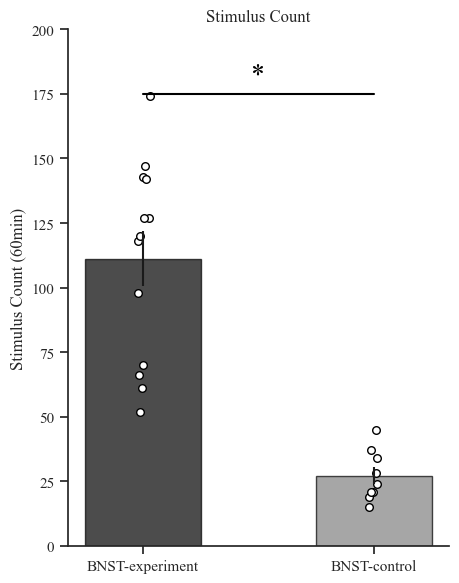

In [19]:
experiment_data = pd.read_csv(experiment_group_file)
control_data = pd.read_csv(control_group_file)
experiment_stimulation_events=[c for c in experiment_data.columns if '_stimulation' in c]
control_stimulation_events=[c for c in control_data.columns if '_stimulation' in c]

# 计算平均值和标准误差
mean_experiment = experiment_data[experiment_stimulation_events].iloc[0].mean()
mean_control = control_data[control_stimulation_events].iloc[0].mean()
sem_experiment = experiment_data[experiment_stimulation_events].iloc[0].sem()
sem_control = control_data[control_stimulation_events].iloc[0].sem()

# 进行 t 检验
experiment_counts = experiment_data[experiment_stimulation_events].iloc[0].values
control_counts = control_data[control_stimulation_events].iloc[0].values
t_stat, p_value = stats.ttest_ind(experiment_counts, control_counts)


# 设置图像大小
plt.figure(figsize=(3, 10))  
plt.rcParams['font.sans-serif'] = 'SimHei' 

#设置柱子宽度和位置
width = 0.04
x_labels = ['Experiment', 'Control']
x_pos = [0, 0.08] 

plt.figure(figsize=(4.75, 6))

# 绘制柱状图
plt.bar(x_pos[0], mean_experiment, width, yerr=sem_experiment, label='BNST-chR2', alpha=0.7, color='black', edgecolor='black')
plt.bar(x_pos[1], mean_control, width, yerr=sem_control, label='BNST-control', alpha=0.7, color='grey', edgecolor='black')


# 设置轻微偏移以绘制散点
jitter_x1_experiment = np.random.normal(x_pos[0], 0.001, len(experiment_data[experiment_stimulation_events].iloc[0, 0:]))  
jitter_x2_control = np.random.normal(x_pos[1], 0.001, len(control_data[control_stimulation_events].iloc[0, 0:]))  


plt.scatter(jitter_x1_experiment, experiment_data[experiment_stimulation_events], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_control, control_data[control_stimulation_events], s=30, color='white', marker='o', edgecolor='black', label=None)
#检验
y_max = max(mean_experiment + sem_experiment, mean_control + sem_control) + 12 
line_height = 175  # 标记线的高度


if p_value < 0.05:
    plt.plot([x_pos[0], x_pos[1]], [line_height, line_height], color='black')  
    plt.text((x_pos[0] + x_pos[1]) / 2, line_height + 2, '*', ha='center', va='bottom', color='black', fontsize=20) 
elif p_value < 0.01:
    plt.plot([x_pos[0], x_pos[1]], [line_height, line_height], color='black')
    plt.text((x_pos[0] + x_pos[1]) / 2, line_height + 2, '**', ha='center', va='bottom', color='black', fontsize=20)
elif p_value < 0.001:
    plt.plot([x_pos[0], x_pos[1]], [line_height, line_height], color='black')
    plt.text((x_pos[0] + x_pos[1]) / 2, line_height + 2, '***', ha='center', va='bottom', color='black', fontsize=20)
else:
    plt.plot([x_pos[0], x_pos[1]], [line_height, line_height], color='black')
    plt.text((x_pos[0] + x_pos[1]) / 2, line_height + 2, 'ns', ha='center', va='bottom', color='black', fontsize=20)

# 添加标签和标题
plt.xticks(x_pos, ['BNST-experiment', 'BNST-control'])
plt.ylabel('Stimulus Count (60min)')
plt.title('Stimulus Count')

# # 显示图例
# #plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1))
plt.ylim(0, 200)
save_fig('stimulus_count-experiment', tight_layout=True)
plt.show()

Saving figure nosopoke result-inhibition


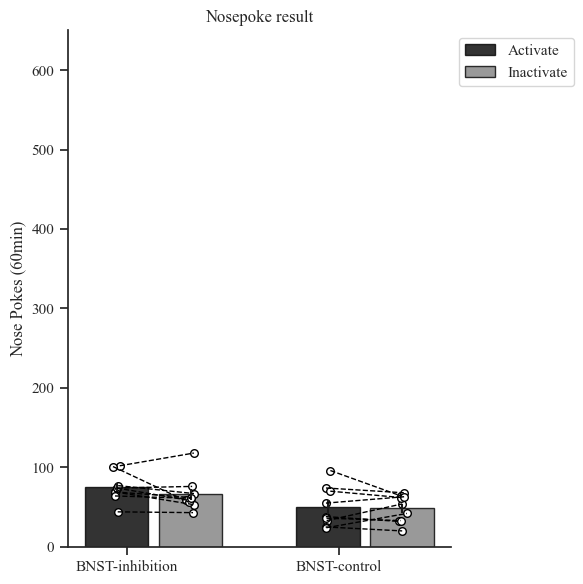

In [20]:
# 读取CSV文件
inhibition_data = pd.read_csv(inhibition_group_file)
control_data = pd.read_csv(control_group_file)
Activate_events_inhibition=[c for c in inhibition_data.columns if '_activate' in c]
Inactivate_events_inhibition=[c for c in inhibition_data.columns if '_inactivate' in c]
Activate_events_control=[c for c in control_data.columns if '_activate' in c]
Inactivate_events_control=[c for c in control_data.columns if '_inactivate' in c]

mean_inhibition_activate = inhibition_data[Activate_events_inhibition].iloc[0].mean()
mean_inhibition_inactivate = inhibition_data[Inactivate_events_inhibition].iloc[0].mean()
mean_control_activate = control_data[Activate_events_control].iloc[0].mean()
mean_control_inactivate = control_data[Inactivate_events_control].iloc[0].mean()

sem_inhibition_activate = inhibition_data[Activate_events_inhibition].iloc[0].sem()
sem_inhibition_inactivate = inhibition_data[Inactivate_events_inhibition].iloc[0].sem()
sem_control_activate = control_data[Activate_events_control].iloc[0].sem()
sem_control_inactivate = control_data[Inactivate_events_control].iloc[0].sem()

# 设置图像大小
plt.figure(figsize=(6, 6))  
plt.rcParams['font.sans-serif'] = 'SimHei'  # 支持中文字体

# 设置柱子宽度和间距
width = 0.3  # 保持柱子宽度
gap = 0.05   # 控制柱间距

# 计算柱子位置
x1 = np.array([0, 1])  # 第一个x轴位置: [实验组, 对照组]
x2 = x1 + width + gap  # 第二个x轴位置，用于未激活事件

# 绘制柱状图
plt.bar(x1[0], mean_inhibition_activate, width, yerr=sem_inhibition_activate, alpha=0.8, label='Activate', color='black', edgecolor='black')
plt.bar(x2[0], mean_inhibition_inactivate, width, yerr=sem_inhibition_inactivate, alpha=0.8, label='Inactivate', color='grey', edgecolor='black')

plt.bar(x1[1], mean_control_activate, width, yerr=sem_control_activate, alpha=0.8, label=None, color='black', edgecolor='black')
plt.bar(x2[1], mean_control_inactivate, width, yerr=sem_control_inactivate, alpha=0.8, label=None, color='grey', edgecolor='black')

# 设置轻微偏移以绘制散点
jitter_x1_inhibition = np.random.normal(x1[0], 0.01, len(inhibition_data[Activate_events_inhibition].iloc[0, 0:]))  # 实验组激活的轻微随机偏移
jitter_x2_inhibition = np.random.normal(x2[0], 0.01, len(inhibition_data[Inactivate_events_inhibition].iloc[0, 0:]))  # 实验组未激活的轻微随机偏移

jitter_x1_control = np.random.normal(x1[1], 0.01, len(control_data[Activate_events_control].iloc[0, 0:]))  # 对照组激活的轻微随机偏移
jitter_x2_control = np.random.normal(x2[1], 0.01, len(control_data[Inactivate_events_control].iloc[0, 0:]))  # 对照组未激活的轻微随机偏移

# 绘制实验组的散点图
plt.scatter(jitter_x1_inhibition, inhibition_data[Activate_events_inhibition], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_inhibition, inhibition_data[Inactivate_events_inhibition], s=30, color='white', marker='o', edgecolor='black', label=None)

# 绘制对照组的散点图
plt.scatter(jitter_x1_control, control_data[Activate_events_control], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_control, control_data[Inactivate_events_control], s=30, color='white', marker='o', edgecolor='black', label=None)

# 实验组连线
for i in range(len(inhibition_data[Activate_events_inhibition].iloc[0, 0:])):
    plt.plot([jitter_x1_inhibition[i], jitter_x2_inhibition[i]], [inhibition_data[Activate_events_inhibition].iloc[0, i], inhibition_data[Inactivate_events_inhibition].iloc[0, i]], color='black', linestyle='--', linewidth=1)

# 对照组连线
for i in range(len(control_data[Activate_events_control].iloc[0, 0:])):
    plt.plot([jitter_x1_control[i], jitter_x2_control[i]], [control_data[Activate_events_control].iloc[0, i], control_data[Inactivate_events_control].iloc[0, i]], color='black', linestyle='--', linewidth=1)

# 添加标题和轴标签
plt.title('Nosepoke result')
plt.ylabel('Nose Pokes (60min)')

# 设置 x 轴刻度
plt.xticks([0.05, 1.05], ['BNST-inhibition', 'BNST-control'])  # 调整位置使得标签居中

# 在柱状图上显示数值
#plt.text(x1[0], mean_experiment_activate, round(mean_experiment_activate, 2), va='bottom', ha='center')
#plt.text(x2[0], mean_experiment_inactivate, round(mean_experiment_inactivate, 2), va='bottom', ha='center')
#plt.text(x1[1], mean_control_activate, round(mean_control_activate, 2), va='bottom', ha='center')
#plt.text(x2[1], mean_control_inactivate, round(mean_control_inactivate, 2), va='bottom', ha='center')

# 设置 y 轴范围
plt.ylim(0, 650)

# 显示图例

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 显示图表
plt.tight_layout()
save_fig('nosopoke result-inhibition', tight_layout=True)
plt.show()

Saving figure stimulus_count-inhibition


<Figure size 300x1000 with 0 Axes>

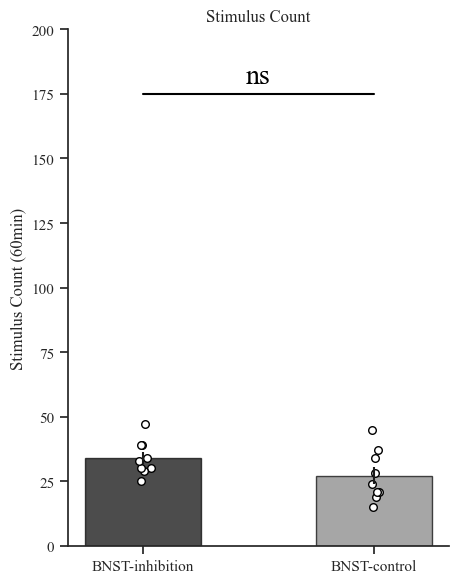

In [21]:
inhibition_data = pd.read_csv(inhibition_group_file)
control_data = pd.read_csv(control_group_file)
inhibition_stimulation_events=[c for c in inhibition_data.columns if '_stimulation' in c]
control_stimulation_events=[c for c in control_data.columns if '_stimulation' in c]

# 计算平均值和标准误差
mean_inhibition = inhibition_data[inhibition_stimulation_events].iloc[0].mean()
mean_control = control_data[control_stimulation_events].iloc[0].mean()
sem_inhibition = inhibition_data[inhibition_stimulation_events].iloc[0].sem()
sem_control = control_data[control_stimulation_events].iloc[0].sem()

# 进行 t 检验
inhibition_counts = inhibition_data[inhibition_stimulation_events].iloc[0].values
control_counts = control_data[control_stimulation_events].iloc[0].values
t_stat, p_value = stats.ttest_ind(inhibition_counts, control_counts)


# 设置图像大小
plt.figure(figsize=(3, 10))  
plt.rcParams['font.sans-serif'] = 'SimHei' 

#设置柱子宽度和位置
width = 0.04
x_labels = ['Inhibition', 'Control']
x_pos = [0, 0.08] 

plt.figure(figsize=(4.75, 6))

# 绘制柱状图
plt.bar(x_pos[0], mean_inhibition, width, yerr=sem_inhibition, label='BNST-chR2', alpha=0.7, color='black', edgecolor='black')
plt.bar(x_pos[1], mean_control, width, yerr=sem_control, label='BNST-control', alpha=0.7, color='grey', edgecolor='black')


# 设置轻微偏移以绘制散点
jitter_x1_inhibition = np.random.normal(x_pos[0], 0.001, len(inhibition_data[inhibition_stimulation_events].iloc[0, 0:]))  
jitter_x2_control = np.random.normal(x_pos[1], 0.001, len(control_data[control_stimulation_events].iloc[0, 0:]))  


plt.scatter(jitter_x1_inhibition, inhibition_data[inhibition_stimulation_events], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_control, control_data[control_stimulation_events], s=30, color='white', marker='o', edgecolor='black', label=None)
#检验
y_max = max(mean_inhibition + sem_inhibition, mean_control + sem_control) + 12 
line_height = 175  # 标记线的高度


if p_value < 0.05:
    plt.plot([x_pos[0], x_pos[1]], [line_height, line_height], color='black')  
    plt.text((x_pos[0] + x_pos[1]) / 2, line_height + 2, '*', ha='center', va='bottom', color='black', fontsize=20) 
elif p_value < 0.01:
    plt.plot([x_pos[0], x_pos[1]], [line_height, line_height], color='black')
    plt.text((x_pos[0] + x_pos[1]) / 2, line_height + 2, '**', ha='center', va='bottom', color='black', fontsize=20)
elif p_value < 0.001:
    plt.plot([x_pos[0], x_pos[1]], [line_height, line_height], color='black')
    plt.text((x_pos[0] + x_pos[1]) / 2, line_height + 2, '***', ha='center', va='bottom', color='black', fontsize=20)
else:
    plt.plot([x_pos[0], x_pos[1]], [line_height, line_height], color='black')
    plt.text((x_pos[0] + x_pos[1]) / 2, line_height + 2, 'ns', ha='center', va='bottom', color='black', fontsize=20)

# 添加标签和标题
plt.xticks(x_pos, ['BNST-inhibition', 'BNST-control'])
plt.ylabel('Stimulus Count (60min)')
plt.title('Stimulus Count')

# # 显示图例
# #plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1))
plt.ylim(0, 200)
save_fig('stimulus_count-inhibition', tight_layout=True)
plt.show()

加inhibition组

Saving figure nosopoke result


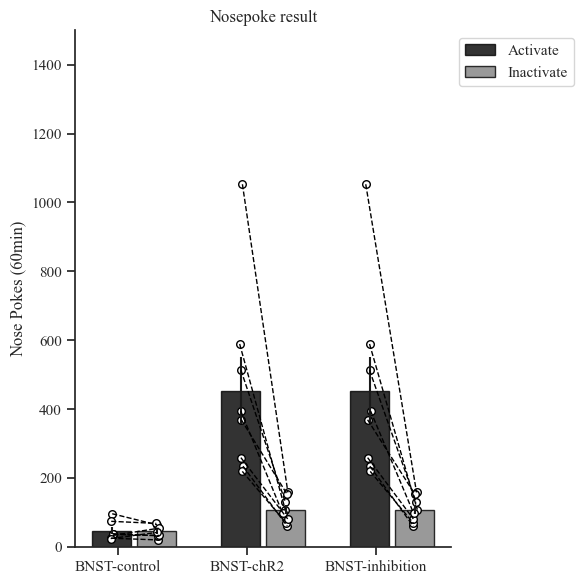

In [17]:
# 读取CSV文件
experiment_data = pd.read_csv(experiment_group_file)
control_data = pd.read_csv(control_group_file)
inhibition_data = pd.read_csv(inhibition_group_file)
Activate_events_experiment=[c for c in experiment_data.columns if '_activate' in c]
Inactivate_events_experiment=[c for c in experiment_data.columns if '_inactivate' in c]
Activate_events_control=[c for c in control_data.columns if '_activate' in c]
Inactivate_events_control=[c for c in control_data.columns if '_inactivate' in c]
Activate_events_inhibition=[c for c in inhibition_data.columns if '_activate' in c]
Inactivate_events_inhibition=[c for c in inhibition_data.columns if '_inactivate' in c]

mean_experiment_activate = experiment_data[Activate_events_experiment].mean(axis=1)
mean_experiment_inactivate = experiment_data[Inactivate_events_experiment].mean(axis=1)
mean_control_activate = control_data[Activate_events_control].mean(axis=1)
mean_control_inactivate = control_data[Inactivate_events_control].mean(axis=1)
mean_inhibition_activate = inhibition_data[Activate_events_inhibition].mean(axis=1)
mean_inhibition_inactivate = inhibition_data[Inactivate_events_inhibition].mean(axis=1)

sem_experiment_activate = experiment_data[Activate_events_experiment].sem(axis=1)
sem_experiment_inactivate = experiment_data[Inactivate_events_experiment].sem(axis=1)
sem_control_activate = control_data[Activate_events_control].sem(axis=1)
sem_control_inactivate = control_data[Inactivate_events_control].sem(axis=1)
sem_inhibition_activate = inhibition_data[Activate_events_inhibition].sem(axis=1)
sem_inhibition_inactivate = inhibition_data[Inactivate_events_inhibition].sem(axis=1)

# 设置图像大小
plt.figure(figsize=(6, 6))  
plt.rcParams['font.sans-serif'] = 'SimHei'  # 支持中文字体

# 设置柱子宽度和间距
width = 0.3  # 保持柱子宽度
gap = 0.05   # 控制柱间距

# 计算柱子位置
x1 = np.array([0, 1, 2])  # 第一个x轴位置: [实验组, 对照组]
x2 = x1 + width + gap  # 第二个x轴位置，用于未激活事件


# 绘制柱状图
plt.bar(x1[0], mean_control_activate, width, yerr=sem_control_activate, alpha=0.8, label=None, color='black', edgecolor='black')
plt.bar(x2[0], mean_control_inactivate, width, yerr=sem_control_inactivate, alpha=0.8, label=None, color='grey', edgecolor='black')

plt.bar(x1[1], mean_experiment_activate, width, yerr=sem_experiment_activate, alpha=0.8, label='Activate', color='black', edgecolor='black')
plt.bar(x2[1], mean_experiment_inactivate, width, yerr=sem_experiment_inactivate, alpha=0.8, label='Inactivate', color='grey', edgecolor='black')

plt.bar(x1[2], mean_inhibition_activate, width, yerr=sem_inhibition_activate, alpha=0.8, label=None, color='black', edgecolor='black')
plt.bar(x2[2], mean_inhibition_inactivate, width, yerr=sem_inhibition_inactivate, alpha=0.8, label=None, color='grey', edgecolor='black')
# 设置轻微偏移以绘制散点
jitter_x1_control = np.random.normal(x1[0], 0.01, len(control_data[Activate_events_control].iloc[0, 0:]))  # 对照组激活的轻微随机偏移
jitter_x2_control = np.random.normal(x2[0], 0.01, len(control_data[Inactivate_events_control].iloc[0, 0:]))  # 对照组未激活的轻微随机偏移

jitter_x1_experiment = np.random.normal(x1[1], 0.01, len(experiment_data[Activate_events_experiment].iloc[0, 0:]))  # 实验组激活的轻微随机偏移
jitter_x2_experiment = np.random.normal(x2[1], 0.01, len(experiment_data[Inactivate_events_experiment].iloc[0, 0:]))  # 实验组未激活的轻微随机偏移

jitter_x1_inhibition = np.random.normal(x1[2], 0.01, len(inhibition_data[Activate_events_inhibition].iloc[0, 0:]))  # 实验组激活的轻微随机偏移
jitter_x2_inhibition = np.random.normal(x2[2], 0.01, len(inhibition_data[Inactivate_events_inhibition].iloc[0, 0:]))  # 实验组未激活的轻微随机偏移
# 绘制实验组的散点图
plt.scatter(jitter_x1_experiment, experiment_data[Activate_events_experiment], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_experiment, experiment_data[Inactivate_events_experiment], s=30, color='white', marker='o', edgecolor='black', label=None)

# 绘制对照组的散点图
plt.scatter(jitter_x1_control, control_data[Activate_events_control], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_control, control_data[Inactivate_events_control], s=30, color='white', marker='o', edgecolor='black', label=None)

# 绘制抑制组的散点图
plt.scatter(jitter_x1_inhibition, inhibition_data[Activate_events_inhibition], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_inhibition, inhibition_data[Inactivate_events_inhibition], s=30, color='white', marker='o', edgecolor='black', label=None)

# 实验组连线
for i in range(len(experiment_data[Activate_events_experiment].iloc[0, 0:])):
    plt.plot([jitter_x1_experiment[i], jitter_x2_experiment[i]], [experiment_data[Activate_events_experiment].iloc[0, i], experiment_data[Inactivate_events_experiment].iloc[0, i]], color='black', linestyle='--', linewidth=1)

# 对照组连线
for i in range(len(control_data[Activate_events_control].iloc[0, 0:])):
    plt.plot([jitter_x1_control[i], jitter_x2_control[i]], [control_data[Activate_events_control].iloc[0, i], control_data[Inactivate_events_control].iloc[0, i]], color='black', linestyle='--', linewidth=1)

# 抑制组连线
for i in range(len(inhibition_data[Activate_events_inhibition].iloc[0, 0:])):
    plt.plot([jitter_x1_inhibition[i], jitter_x2_inhibition[i]], [inhibition_data[Activate_events_inhibition].iloc[0, i], inhibition_data[Inactivate_events_inhibition].iloc[0, i]], color='black', linestyle='--', linewidth=1)

# 添加标题和轴标签
plt.title('Nosepoke result')
plt.ylabel('Nose Pokes (60min)')

# 设置 x 轴刻度
plt.xticks([0.05, 1.05, 2.05], ['BNST-control', 'BNST-chR2', 'BNST-inhibition'])  # 调整位置使得标签居中

# 在柱状图上显示数值
#plt.text(x1[0], mean_experiment_activate, round(mean_experiment_activate, 2), va='bottom', ha='center')
#plt.text(x2[0], mean_experiment_inactivate, round(mean_experiment_inactivate, 2), va='bottom', ha='center')
#plt.text(x1[1], mean_control_activate, round(mean_control_activate, 2), va='bottom', ha='center')
#plt.text(x2[1], mean_control_inactivate, round(mean_control_inactivate, 2), va='bottom', ha='center')

# 设置 y 轴范围
plt.ylim(0, 1500)

# 显示图例

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# 显示图表
plt.tight_layout()
save_fig('nosopoke result', tight_layout=True)
plt.show()

Saving figure stimulus_count


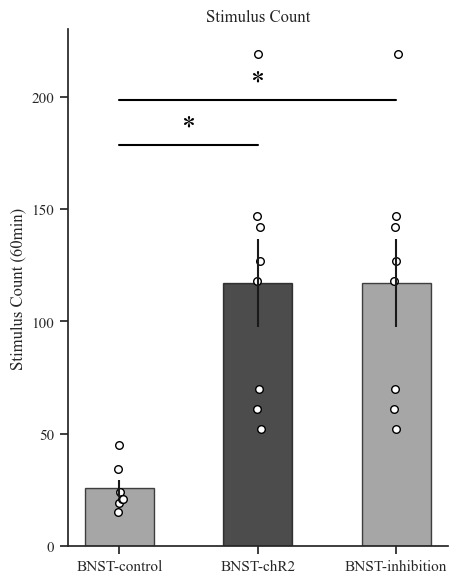

In [19]:
experiment_data = pd.read_csv(experiment_group_file)
control_data = pd.read_csv(control_group_file)
inhibition_data = pd.read_csv(inhibition_group_file)
experiment_stimulation_events=[c for c in experiment_data.columns if '_stimulation' in c]
control_stimulation_events=[c for c in control_data.columns if '_stimulation' in c]
inhibition_stimulation_events=[c for c in inhibition_data.columns if '_stimulation' in c]
# 计算平均值和标准误差
mean_control = control_data[control_stimulation_events].iloc[0].mean()
mean_experiment = experiment_data[experiment_stimulation_events].iloc[0].mean()
mean_inhibition = inhibition_data[inhibition_stimulation_events].iloc[0].mean()
sem_control = control_data[control_stimulation_events].iloc[0].sem()
sem_experiment = experiment_data[experiment_stimulation_events].iloc[0].sem()
sem_inhibition = inhibition_data[inhibition_stimulation_events].iloc[0].sem()
# 进行 t 检验
experiment_counts = experiment_data[experiment_stimulation_events].iloc[0].values
control_counts = control_data[control_stimulation_events].iloc[0].values
inhibition_counts = inhibition_data[inhibition_stimulation_events].iloc[0].values
t1_stat, p1_value = stats.ttest_ind(experiment_counts, control_counts)
t2_stat, p2_value = stats.ttest_ind(inhibition_counts, control_counts)

#设置柱子宽度和位置
width = 0.04
x_labels = ['Experiment', 'Control', 'Inhibition']
x_pos = [0, 0.08, 0.16] 

plt.figure(figsize=(4.75, 6))

# 绘制柱状图
plt.bar(x_pos[0], mean_control, width, yerr=sem_control, label='BNST-control', alpha=0.7, color='grey', edgecolor='black')
plt.bar(x_pos[1], mean_experiment, width, yerr=sem_experiment, label='BNST-chR2', alpha=0.7, color='black', edgecolor='black')
plt.bar(x_pos[2], mean_inhibition, width, yerr=sem_inhibition, label='BNST-inhibition', alpha=0.7, color='grey', edgecolor='black')

# 设置轻微偏移以绘制散点
jitter_x1_control = np.random.normal(x_pos[0], 0.001, len(control_data[control_stimulation_events].iloc[0, 0:]))  
jitter_x2_experiment = np.random.normal(x_pos[1], 0.001, len(experiment_data[experiment_stimulation_events].iloc[0, 0:]))  
jitter_x3_inhibition = np.random.normal(x_pos[2], 0.001, len(inhibition_data[inhibition_stimulation_events].iloc[0, 0:]))  

plt.scatter(jitter_x1_control, control_data[control_stimulation_events], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x2_experiment, experiment_data[experiment_stimulation_events], s=30, color='white', marker='o', edgecolor='black', label=None)
plt.scatter(jitter_x3_inhibition, inhibition_data[inhibition_stimulation_events], s=30, color='white', marker='o', edgecolor='black', label=None)

t1_stat, p1_value = stats.ttest_ind(experiment_counts, control_counts)
t2_stat, p2_value = stats.ttest_ind(inhibition_counts, control_counts)
y1_max = max(mean_experiment + sem_experiment, mean_control + sem_control) + 12 
y2_max = max(mean_inhibition + sem_inhibition, mean_control + sem_control) + 12 
line1_height = y1_max + 30  # 标记线的高度
line2_height = y2_max + 50  # 标记线的高度

if p1_value < 0.05:
    plt.plot([x_pos[0], x_pos[1]], [line1_height, line1_height], color='black')  
    plt.text((x_pos[0] + x_pos[1]) / 2, line1_height + 2, '*', ha='center', va='bottom', color='black', fontsize=20)

elif p1_value < 0.01:
    plt.plot([x_pos[0], x_pos[1]], [line1_height, line1_height], color='black')
    plt.text((x_pos[0] + x_pos[1]) / 2, line1_height + 2, '**', ha='center', va='bottom', color='black', fontsize=20)


elif p1_value < 0.001:
    plt.plot([x_pos[0], x_pos[1]], [line1_height, line1_height], color='black')
    plt.text((x_pos[0] + x_pos[1]) / 2, line1_height + 2, '***', ha='center', va='bottom', color='black', fontsize=20)
else:
    plt.plot([x_pos[0], x_pos[2]], [line1_height, line1_height], color='black')
    plt.text((x_pos[0] + x_pos[2]) / 2, line1_height + 2, 'ns', ha='center', va='bottom', color='black', fontsize=20)

if p2_value < 0.05:
    plt.plot([x_pos[0], x_pos[2]], [line2_height, line2_height], color='black')  
    plt.text((x_pos[0] + x_pos[2]) / 2, line2_height + 2, '*', ha='center', va='bottom', color='black', fontsize=20)

elif p2_value < 0.01:
    plt.plot([x_pos[0], x_pos[2]], [line2_height, line2_height], color='black')
    plt.text((x_pos[0] + x_pos[2]) / 2, line2_height + 2, '**', ha='center', va='bottom', color='black', fontsize=20)


elif p2_value < 0.001:
    plt.plot([x_pos[0], x_pos[2]], [line2_height, line2_height], color='black')
    plt.text((x_pos[0] + x_pos[2]) / 2, line2_height + 2, '***', ha='center', va='bottom', color='black', fontsize=20)
else:
    plt.plot([x_pos[0], x_pos[2]], [line2_height, line2_height], color='black')
    plt.text((x_pos[0] + x_pos[2]) / 2, line2_height + 2, 'ns', ha='center', va='bottom', color='black', fontsize=20)

# 添加标签和标题
plt.xticks(x_pos, ['BNST-control', 'BNST-chR2', 'BNST-inhibition'])
plt.ylabel('Stimulus Count (60min)')
plt.title('Stimulus Count')

# # 显示图例
# #plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1))
#plt.ylim(0, max(mean_experiment, mean_control) + 100)
save_fig('stimulus_count', tight_layout=True)
plt.show()